In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from tqdm import tqdm

In [4]:
def flat_dict(x):
    if len(x) == 0:
        return dict()
    return {k: np.asarray([e[k] for e in x]) for k in x[0].keys()}

In [5]:
from urllib.parse import urlparse
from urllib.request import urlretrieve
import os

def load_data(url, **kwargs):
    path = urlparse(url).path
    filename = os.path.basename(path)
    if not os.path.exists(filename):
        urlretrieve(url, filename)
    return pd.read_csv(filename, **kwargs)

In [6]:
data = load_data('https://github.com/hse-aml/hadron-collider-machine-learning/releases/download/Week_2/training.csv.gz')

In [7]:
data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,...,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,...,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,...,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,...,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,...,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


![scheme](scheme.png)

In this programming assignment you will train a classifier to identify type of a particle. There are six particle types: electron, proton, muon, kaon, pion and ghost. Ghost is a particle with other type than the first five or a detector noise. 

Different particle types remain different responses in the detector systems or subdetectors. Thre are five systems: tracking system, ring imaging Cherenkov detector (RICH), electromagnetic and hadron calorimeters, and muon system.

![pid](pid.png)

### List of columns in the samples

Here, **Spd** stands for Scintillating Pad Detector, **Prs** - Preshower, **Ecal** - electromagnetic calorimeter, **Hcal** - hadronic calorimeter, **Brem** denotes traces of the particles that were deflected by detector.

- ID - id value for tracks (presents only in the test file for the submitting purposes)
- Label - string valued observable denoting particle types. Can take values "Electron", "Muon", "Kaon", "Proton", "Pion" and "Ghost". This column is absent in the test file.
- FlagSpd - flag (0 or 1), if reconstructed track passes through Spd
- FlagPrs - flag (0 or 1), if reconstructed track passes through Prs
- FlagBrem - flag (0 or 1), if reconstructed track passes through Brem
- FlagEcal - flag (0 or 1), if reconstructed track passes through Ecal
- FlagHcal - flag (0 or 1), if reconstructed track passes through Hcal
- FlagRICH1 - flag (0 or 1), if reconstructed track passes through the first RICH detector
- FlagRICH2 - flag (0 or 1), if reconstructed track passes through the second RICH detector
- FlagMuon - flag (0 or 1), if reconstructed track passes through muon stations (Muon)
- SpdE - energy deposit associated to the track in the Spd
- PrsE - energy deposit associated to the track in the Prs
- EcalE - energy deposit associated to the track in the Hcal
- HcalE - energy deposit associated to the track in the Hcal
- PrsDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Prs
- BremDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Brem
- TrackP - particle momentum
- TrackPt - particle transverse momentum
- TrackNDoFSubdetector1  - number of degrees of freedom for track fit using hits in the tracking sub-detector1
- TrackQualitySubdetector1 - chi2 quality of the track fit using hits in the tracking sub-detector1
- TrackNDoFSubdetector2 - number of degrees of freedom for track fit using hits in the tracking sub-detector2
- TrackQualitySubdetector2 - chi2 quality of the track fit using hits in the  tracking sub-detector2
- TrackNDoF - number of degrees of freedom for track fit using hits in all tracking sub-detectors
- TrackQualityPerNDoF - chi2 quality of the track fit per degree of freedom
- TrackDistanceToZ - distance between track and z-axis (beam axis)
- Calo2dFitQuality - quality of the 2d fit of the clusters in the calorimeter 
- Calo3dFitQuality - quality of the 3d fit in the calorimeter with assumption that particle was electron
- EcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Ecal
- EcalDLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from Ecal
- EcalShowerLongitudinalParameter - longitudinal parameter of Ecal shower
- HcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Hcal
- HcalDLLbeMuon - delta log-likelihood for a particle candidate to be using information from Hcal
- RICHpFlagElectron - flag (0 or 1) if momentum is greater than threshold for electrons to produce Cherenkov light
- RICHpFlagProton - flag (0 or 1) if momentum is greater than threshold for protons to produce Cherenkov light
- RICHpFlagPion - flag (0 or 1) if momentum is greater than threshold for pions to produce Cherenkov light
- RICHpFlagKaon - flag (0 or 1) if momentum is greater than threshold for kaons to produce Cherenkov light
- RICHpFlagMuon - flag (0 or 1) if momentum is greater than threshold for muons to produce Cherenkov light
- RICH_DLLbeBCK  - delta log-likelihood for a particle candidate to be background using information from RICH
- RICH_DLLbeKaon - delta log-likelihood for a particle candidate to be kaon using information from RICH
- RICH_DLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from RICH
- RICH_DLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from RICH
- RICH_DLLbeProton - delta log-likelihood for a particle candidate to be proton using information from RICH
- MuonFlag - muon flag (is this track muon) which is determined from muon stations
- MuonLooseFlag muon flag (is this track muon) which is determined from muon stations using looser criteria
- MuonLLbeBCK - log-likelihood for a particle candidate to be not muon using information from muon stations
- MuonLLbeMuon - log-likelihood for a particle candidate to be muon using information from muon stations
- DLLelectron - delta log-likelihood for a particle candidate to be electron using information from all subdetectors
- DLLmuon - delta log-likelihood for a particle candidate to be muon using information from all subdetectors
- DLLkaon - delta log-likelihood for a particle candidate to be kaon using information from all subdetectors
- DLLproton - delta log-likelihood for a particle candidate to be proton using information from all subdetectors
- GhostProbability - probability for a particle candidate to be ghost track. This variable is an output of classification model used in the tracking algorithm.

Delta log-likelihood in the features descriptions means the difference between log-likelihood for the mass hypothesis that a given track is made by some particle (for example, electron) and log-likelihood for the mass hypothesis that a given track is produced by a pion (so, DLLpion = 0 and thus we don't have these columns). This is done since most tracks (~80%) are left by pions and in practice we actually need to discriminate other particles from pions. In other words, the null hypothesis is that particle is a pion.

![features](features.jpg)

In [8]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data.Label)
y = le.transform(data.Label).astype(np.float32)

In [9]:
labels = np.array(le.classes_, dtype=str)
labels

array(['Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton'], dtype='<U8')

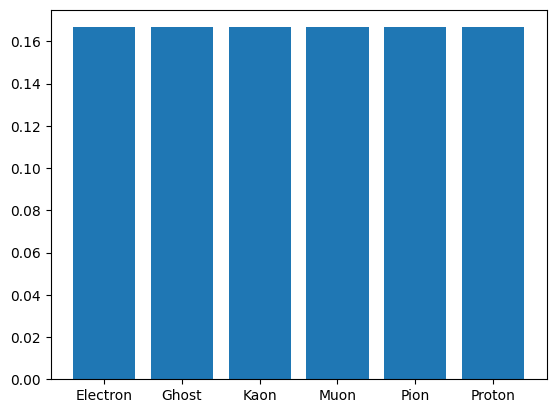

In [10]:
count = np.array([(data.Label == l).sum() for l in labels])
plt.bar(np.arange(len(labels)), count / np.sum(count))
plt.xticks(np.arange(len(labels)), labels)
plt.show()

In [11]:
features = data.columns[data.columns != 'Label']
x = np.asarray(data[features])

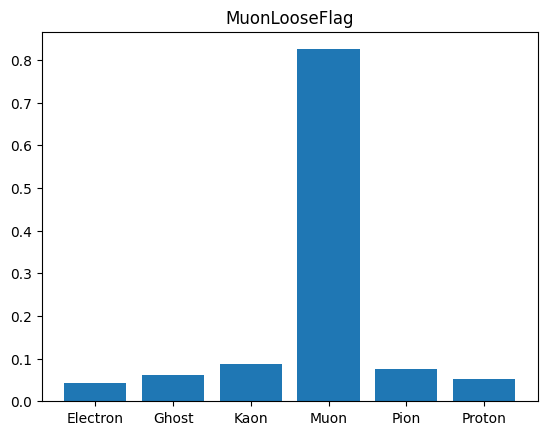

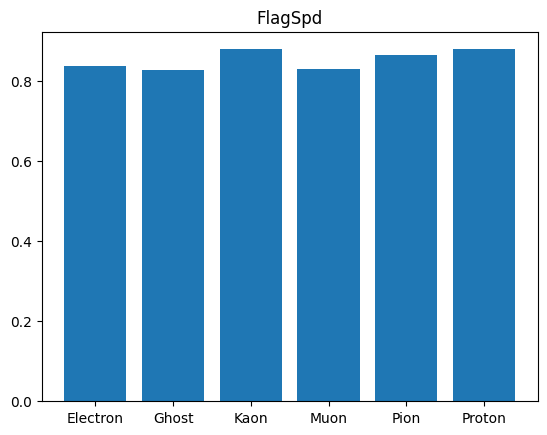

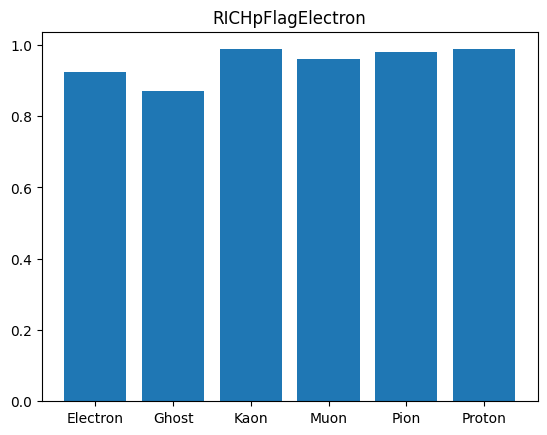

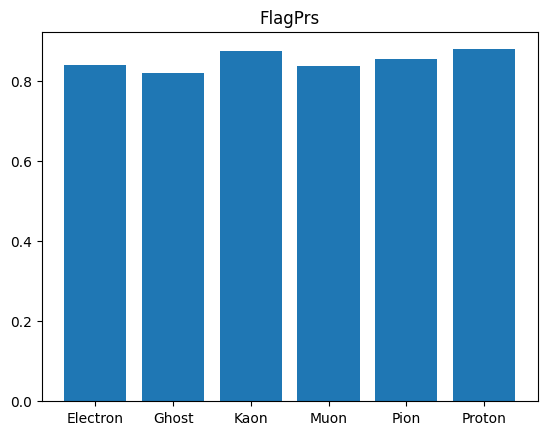

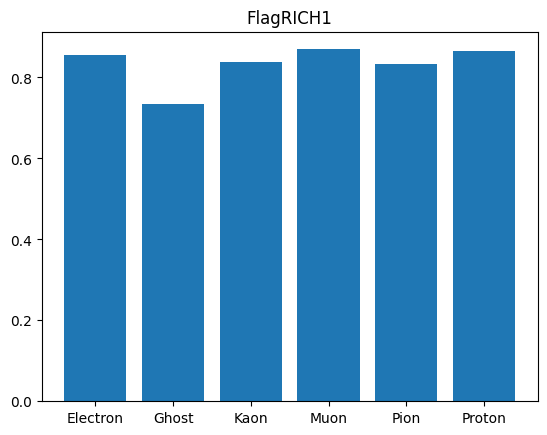

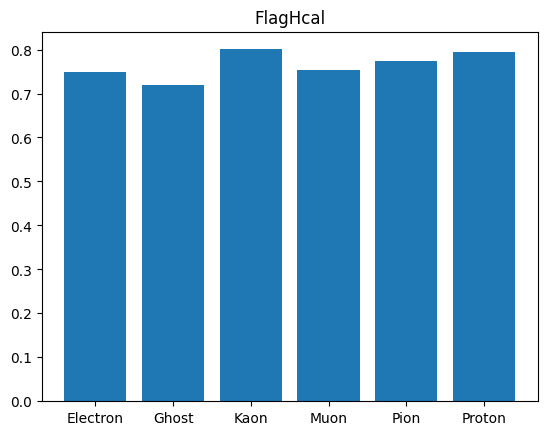

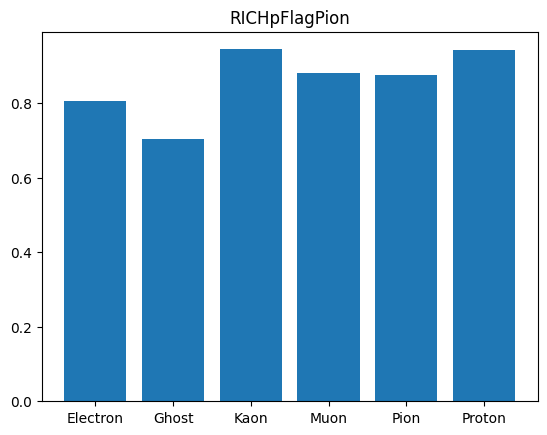

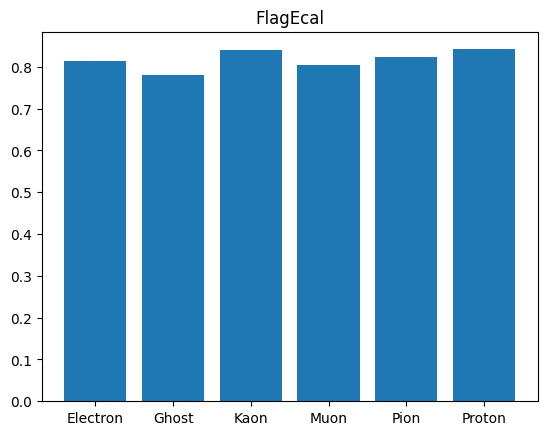

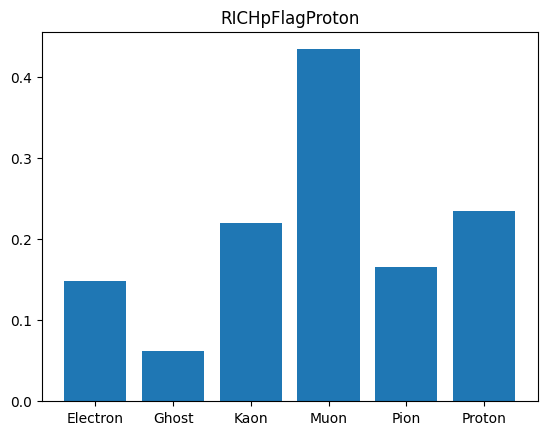

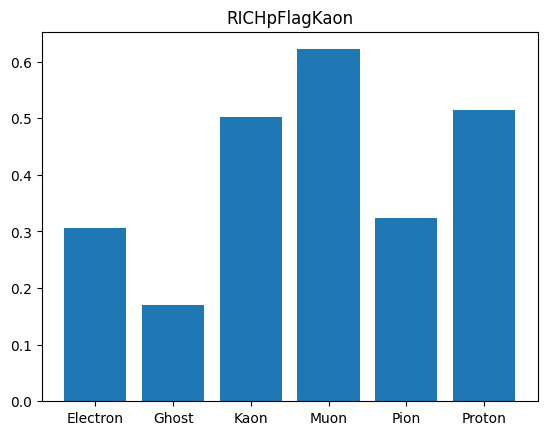

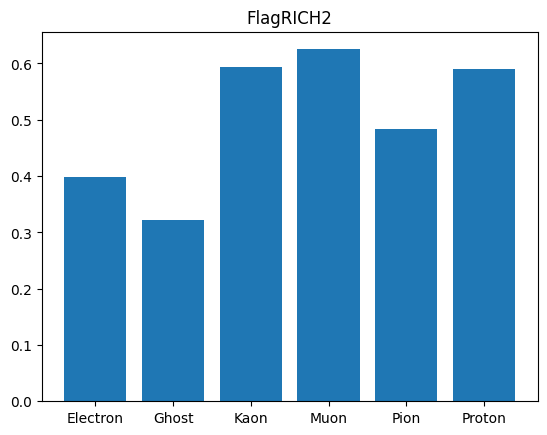

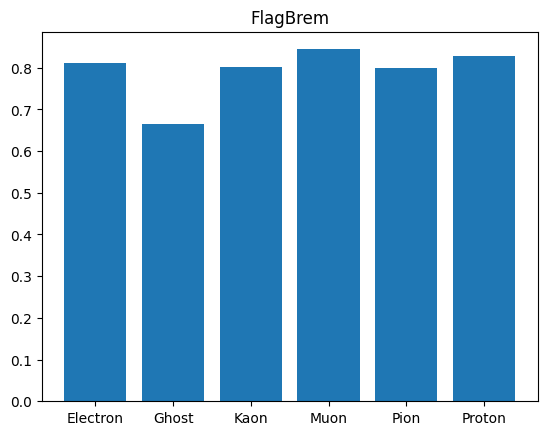

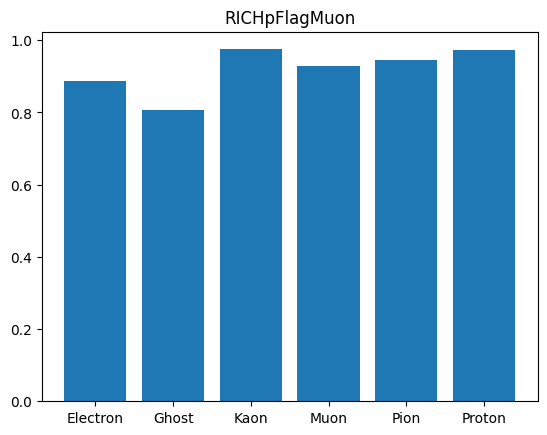

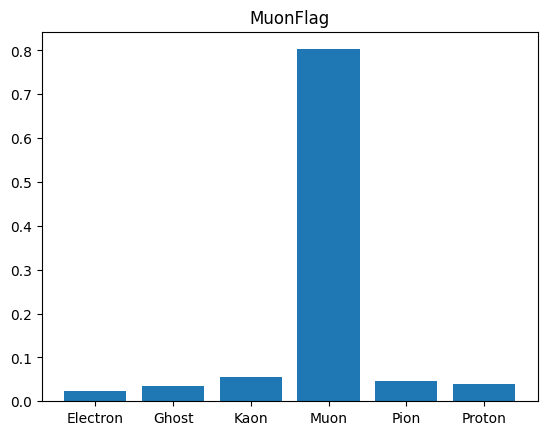

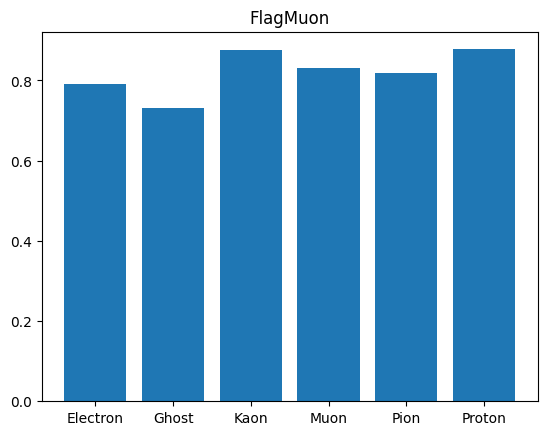

In [12]:
for s in features:
    if s.find("Flag") < 0:
        continue
    plt.figure()
    ratio = np.array([data[data.Label == l][s].sum() for l in labels]) / count
    plt.title(s)
    plt.bar(np.arange(len(labels)), ratio)
    plt.xticks(np.arange(len(labels)), labels)
    plt.show()

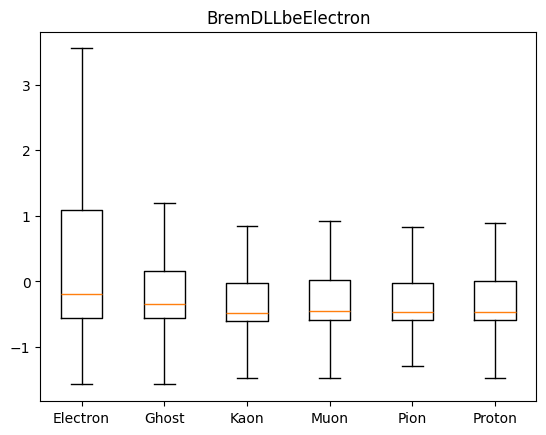

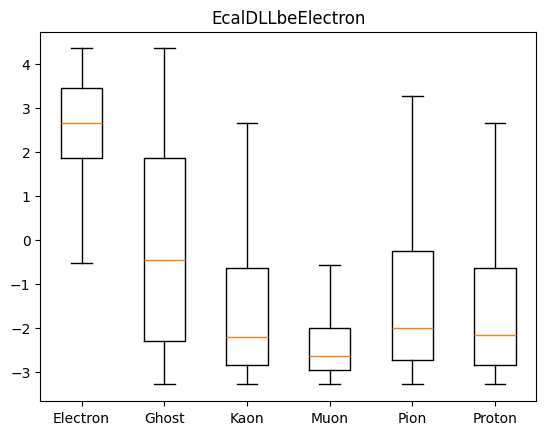

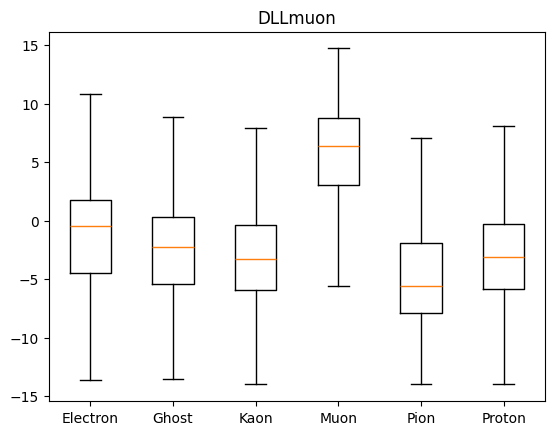

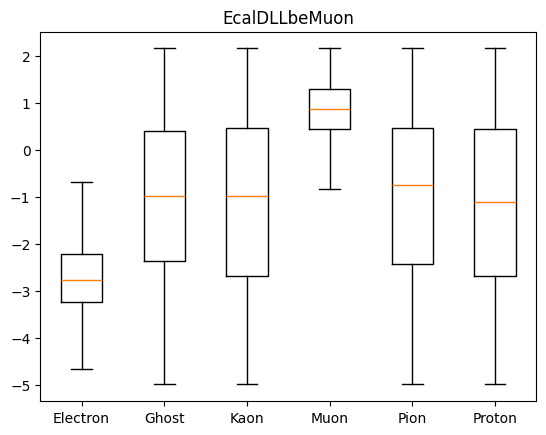

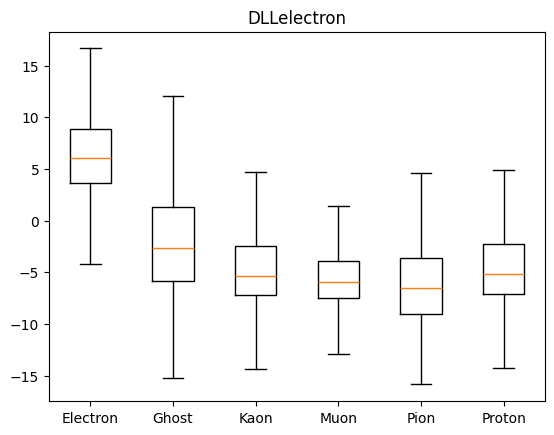

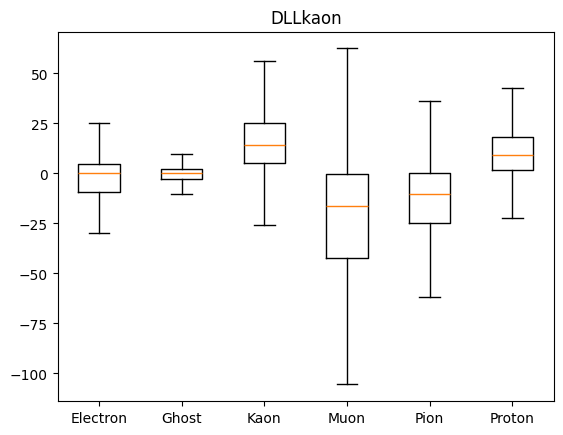

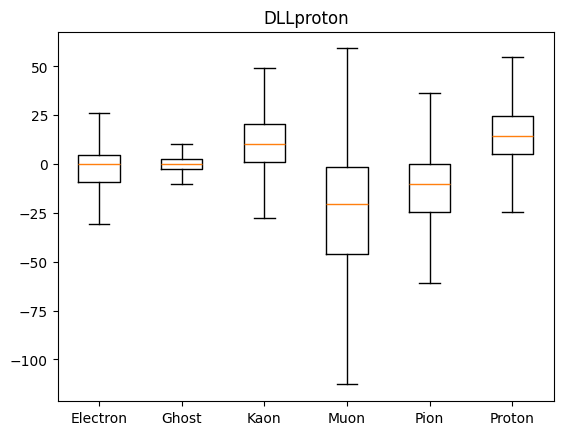

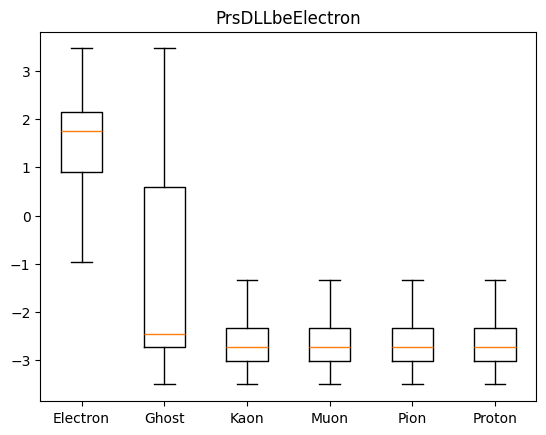

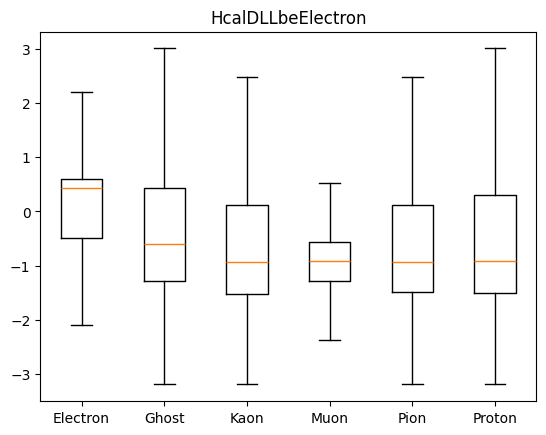

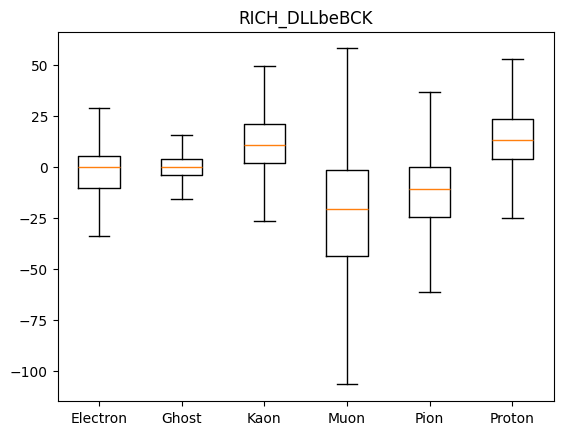

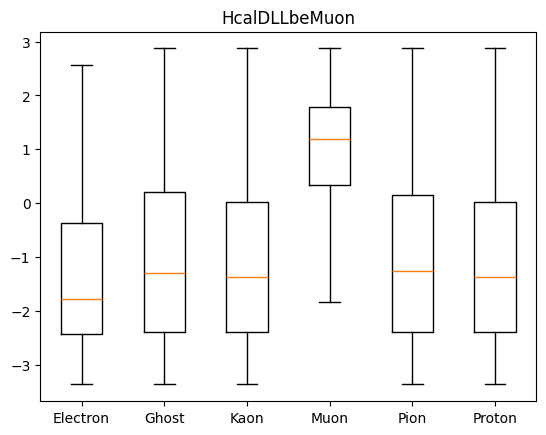

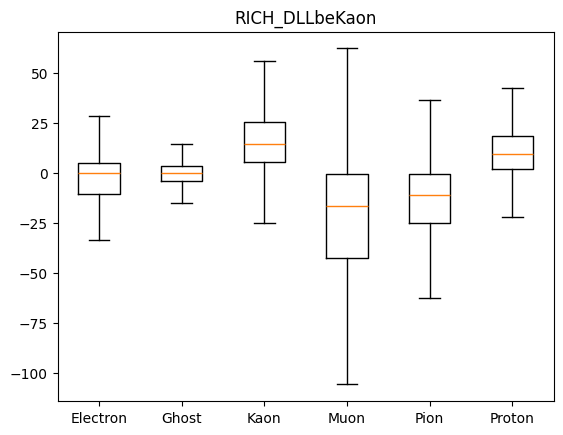

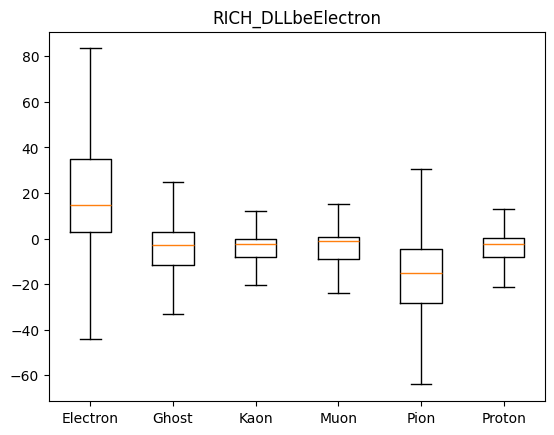

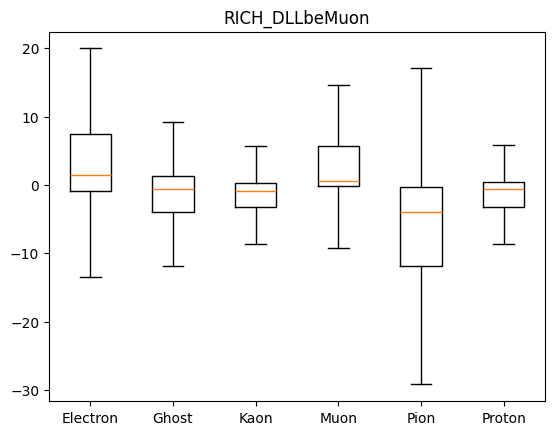

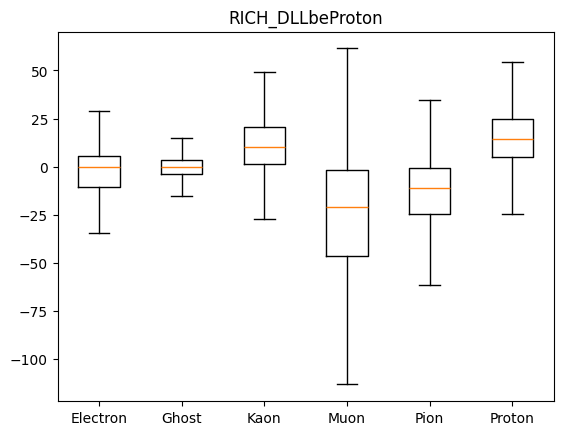

In [13]:
for s in features:
    if s.find("DLL") < 0:
        continue
    plt.figure()
    dll = list([data[data.Label == l][s] for l in labels])
    dll = list([x[x > -998] for x in dll])
    plt.title(s)
    plt.boxplot(dll, showfliers=False)
    plt.xticks(np.arange(len(labels))+1, labels)
    plt.show()

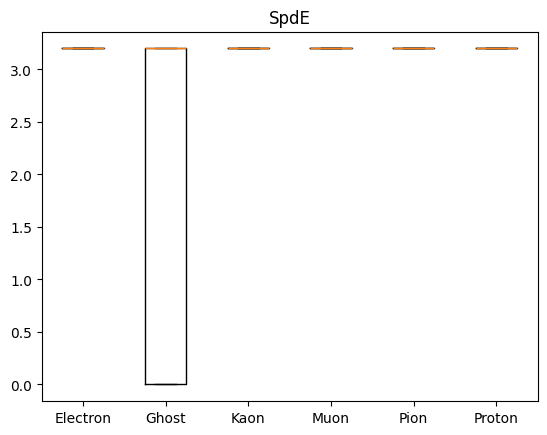

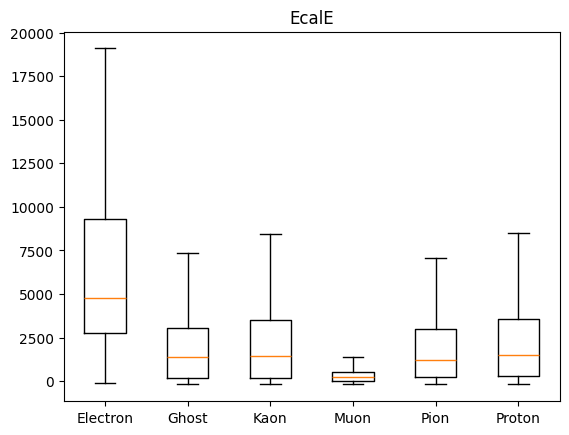

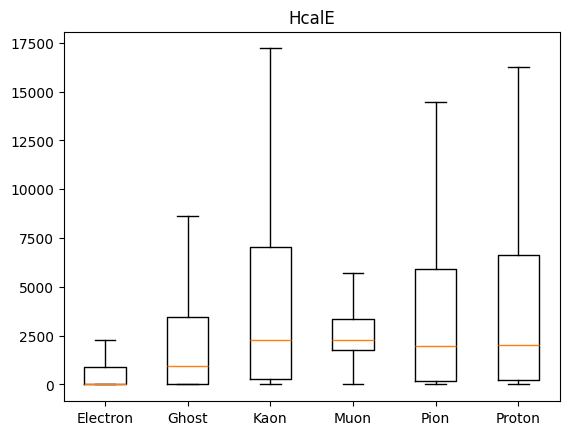

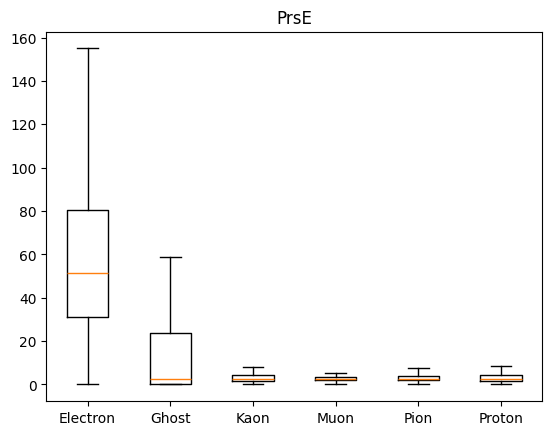

In [14]:
import re

for s in features:
    if not re.match(r'(.*?)E$', s):
        continue
    plt.figure()
    e = list([data[data.Label == l][s] for l in labels])
    e = list([x[x > -998] for x in e])
    plt.title(s)
    plt.boxplot(e, showfliers=False)
    plt.xticks(np.arange(len(labels))+1, labels)
    plt.show()

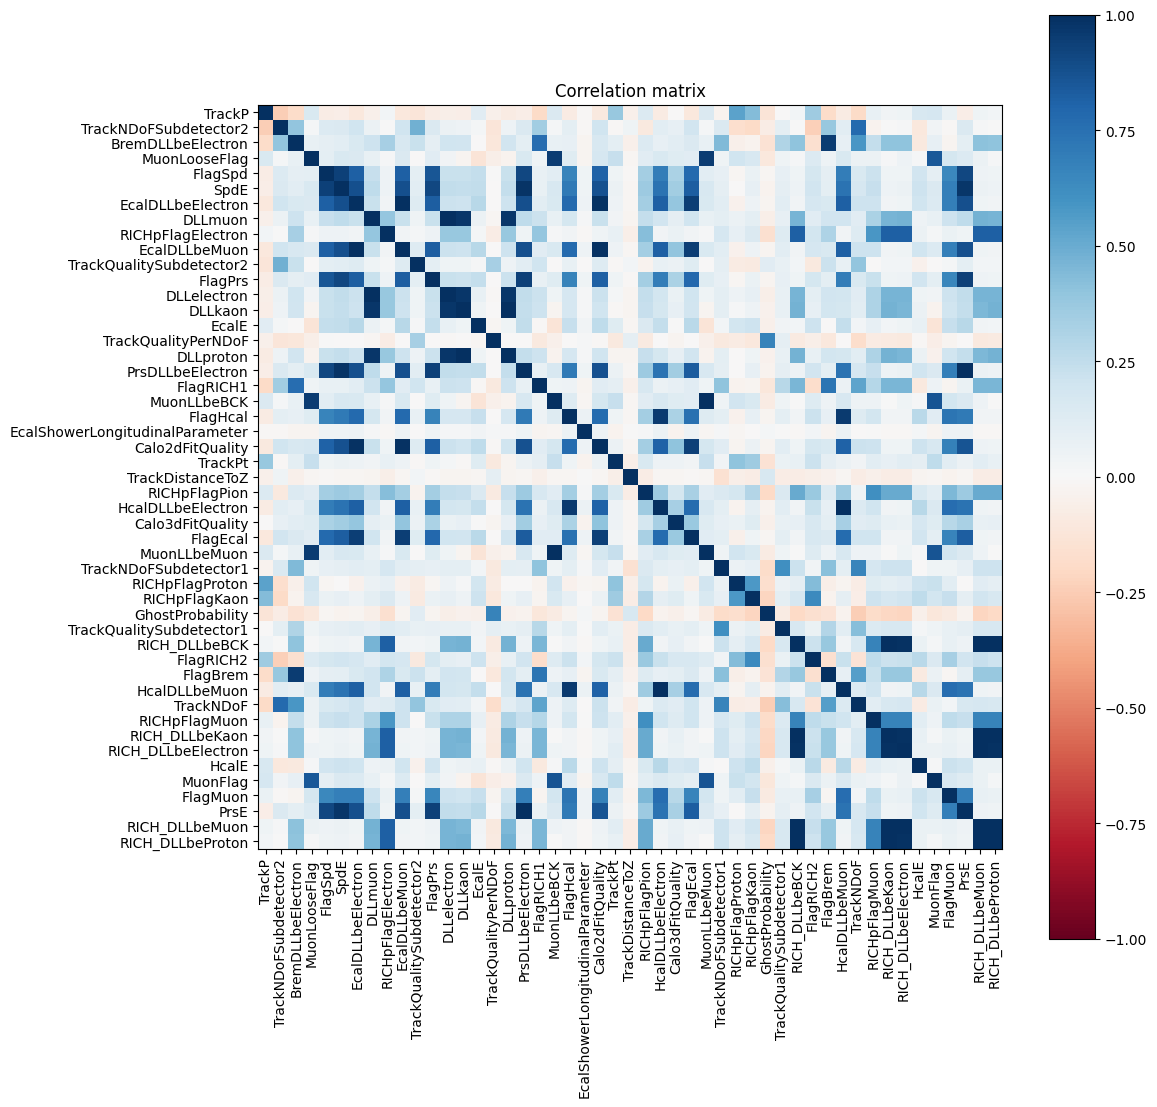

In [15]:
x_cov = np.cov(x.T)
sigma = np.sqrt(np.diag(x_cov))
x_cor = x_cov / np.outer(sigma, sigma)

plt.figure(figsize=(12, 12))
vmax = 1.0
plt.imshow(x_cor, interpolation='nearest', vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu)
plt.title("Correlation matrix")
plt.colorbar()
plt.yticks(np.arange(len(features)), features)
plt.xticks(rotation=90)
_ = plt.xticks(np.arange(len(features)), features)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

## Один против всех

### Логистическая регрессия

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import sklearn.metrics

scaling = True

if scaling:
    scaler = StandardScaler().fit(x_train)
    z_train = scaler.transform(x_train)
    z_test = scaler.transform(x_test)
else:
    z_train = x_train
    z_test = x_test

roc = {}
auc = {}
for l, label in enumerate(tqdm(labels)):
    one_y_train = np.asarray((y_train == l).astype(np.float32))
    one_y_test = np.asarray((y_test == l).astype(np.float32))
    
    c = LogisticRegression(n_jobs=-1, max_iter=500)
    c.fit(z_train, one_y_train.reshape(-1))
    
    y_pred = c.predict(z_test)
    scores = c.predict_proba(z_test)[:,1]
    
    fpr, tpr, _ = sklearn.metrics.roc_curve(one_y_test, scores)
    roc[l] = {"tpr": tpr, "fpr": fpr}
    auc[l] = sklearn.metrics.roc_auc_score(one_y_test, scores)

100%|██████████████████████| 6/6 [02:28<00:00, 24.72s/it]


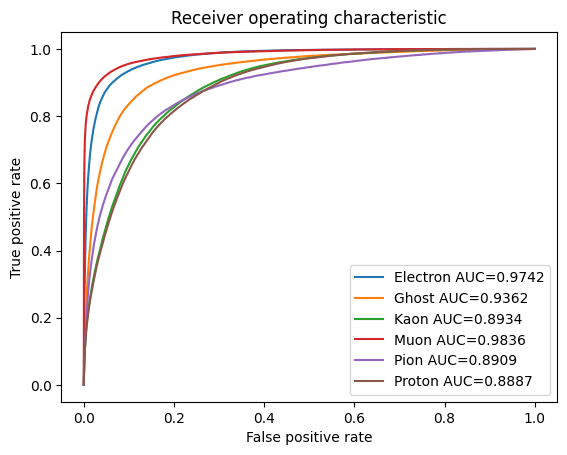

In [18]:
plt.figure()
plt.title("Receiver operating characteristic")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
for l, label in enumerate(labels):
    plt.plot(roc[l]['fpr'], roc[l]['tpr'], label='{} AUC={:.4f}'.format(label, auc[l]))
_ = plt.legend(loc='lower right')

## Многоклассовый классификатор

In [19]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics

c = LogisticRegression(n_jobs=-1, max_iter=500)
c.fit(z_train, y_train.reshape(-1))

scores = c.predict_proba(z_test)

roc = {}
auc = {}
for l, label in enumerate(labels):
    lscores = scores[:,l]
    one_y_test = np.asarray((y_test == l).astype(np.float32))
    
    fpr, tpr, _ = sklearn.metrics.roc_curve(one_y_test, lscores)
    roc[l] = {"tpr": tpr, "fpr": fpr}
    auc[l] = sklearn.metrics.roc_auc_score(one_y_test, lscores)

/home/matwey/venv/3.11/lib64/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


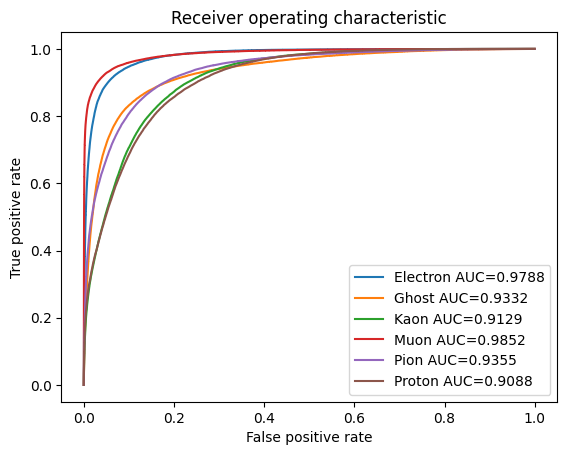

In [20]:
plt.figure()
plt.title("Receiver operating characteristic")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
for l, label in enumerate(labels):
    plt.plot(roc[l]['fpr'], roc[l]['tpr'], label='{} AUC={:.4f}'.format(label, auc[l]))
_ = plt.legend(loc='lower right')

### Случайный лес

In [21]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics

roc = {}
auc = {}
for l, label in enumerate(tqdm(labels)):
    one_y_train = np.asarray((y_train == l).astype(np.float32))
    one_y_test = np.asarray((y_test == l).astype(np.float32))
    
    c = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=6)
    c.fit(x_train, one_y_train.reshape(-1))
    
    y_pred = c.predict(x_test)
    scores = c.predict_proba(x_test)[:,1]
    
    fpr, tpr, _ = sklearn.metrics.roc_curve(one_y_test, scores)
    roc[l] = {"tpr": tpr, "fpr": fpr}
    auc[l] = sklearn.metrics.roc_auc_score(one_y_test, scores)

100%|█████████████████████| 6/6 [12:29<00:00, 124.99s/it]


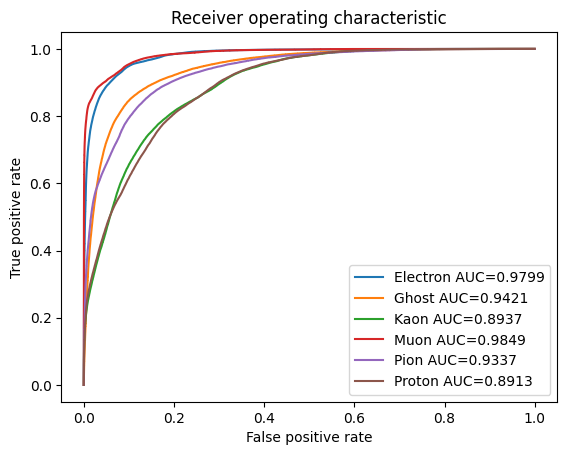

In [22]:
plt.figure()
plt.title("Receiver operating characteristic")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
for l, label in enumerate(labels):
    plt.plot(roc[l]['fpr'], roc[l]['tpr'], label='{} AUC={:.4f}'.format(label, auc[l]))
_ = plt.legend(loc='lower right')

## Многоклассовый классификатор

In [23]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics

c = RandomForestClassifier(n_jobs=-1, n_estimators=150, max_depth=10)
c.fit(x_train, y_train.reshape(-1))

scores = c.predict_proba(x_test)

roc = {}
auc = {}
for l, label in enumerate(labels):
    lscores = scores[:,l]
    one_y_test = np.asarray((y_test == l).astype(np.float32))
    
    fpr, tpr, _ = sklearn.metrics.roc_curve(one_y_test, lscores)
    roc[l] = {"tpr": tpr, "fpr": fpr}
    auc[l] = sklearn.metrics.roc_auc_score(one_y_test, lscores)

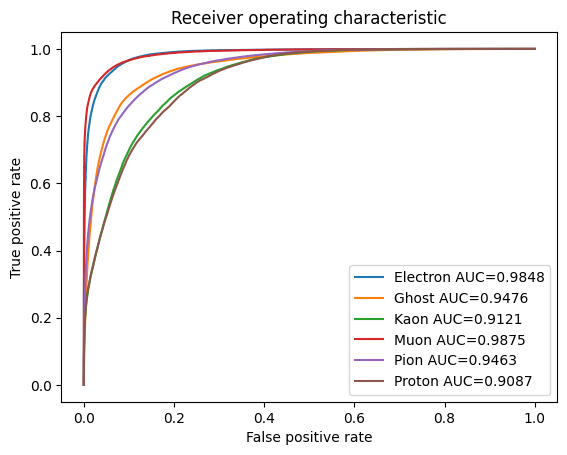

In [24]:
plt.figure()
plt.title("Receiver operating characteristic")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
for l, label in enumerate(labels):
    plt.plot(roc[l]['fpr'], roc[l]['tpr'], label='{} AUC={:.4f}'.format(label, auc[l]))
_ = plt.legend(loc='lower right')

              precision    recall  f1-score   support

    Electron       0.86      0.87      0.86     49983
       Ghost       0.72      0.76      0.74     49964
        Kaon       0.63      0.56      0.59     49901
        Muon       0.92      0.87      0.89     50344
        Pion       0.64      0.81      0.71     49894
      Proton       0.64      0.54      0.59     49914

    accuracy                           0.73    300000
   macro avg       0.74      0.73      0.73    300000
weighted avg       0.74      0.73      0.73    300000



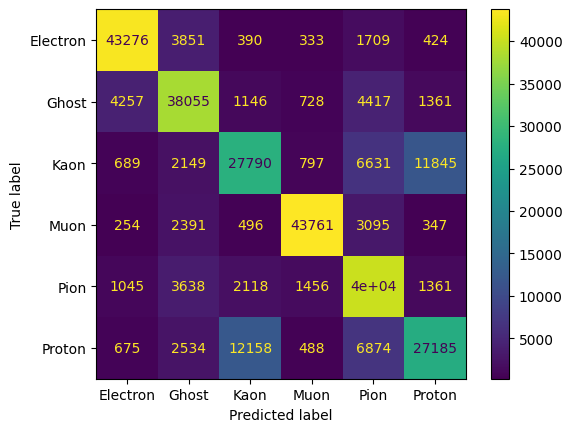

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

y_true = y_test
y_pred = c.predict(x_test)

print(classification_report(y_true, y_pred, target_names=labels))

cm = confusion_matrix(y_true, y_pred)

cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
_ = cmd.plot()

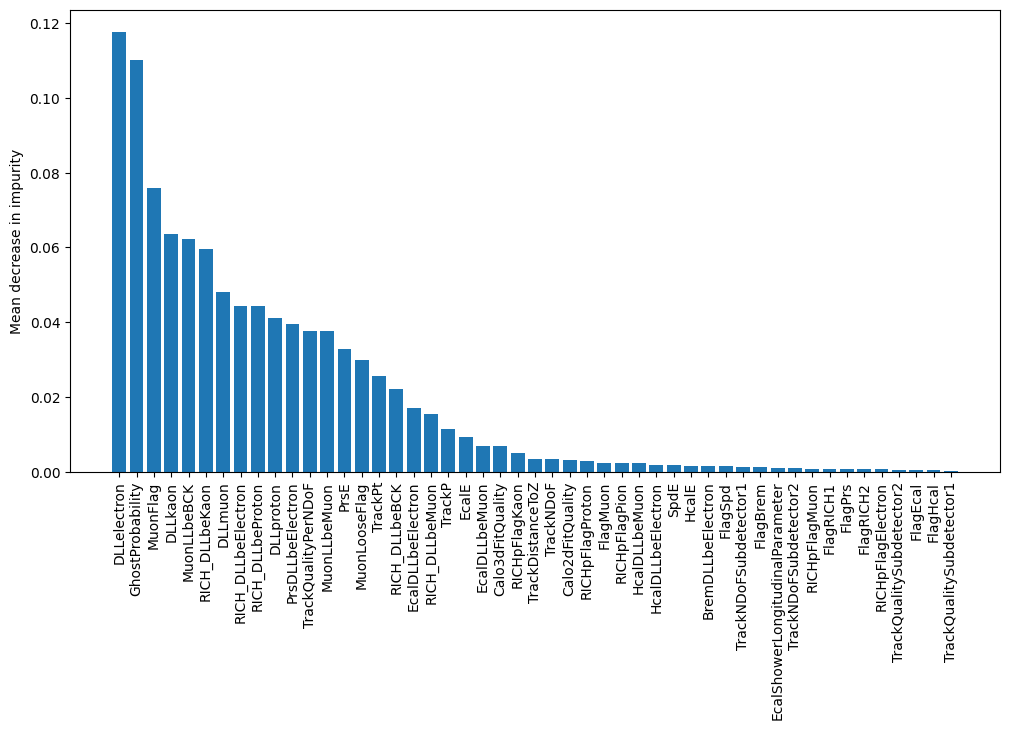

In [26]:
importances = c.feature_importances_
order = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(importances)), importances[order])
plt.xticks(np.arange(len(features)), features[order])
plt.xticks(rotation=90)
plt.ylabel("Mean decrease in impurity")
plt.show()

In [27]:
from xgboost import XGBClassifier
import sklearn.metrics

c = XGBClassifier(n_jobs=-1, max_depth=3, n_estimators=10)
c.fit(x_train, y_train.reshape(-1))

scores = c.predict_proba(x_test)

roc = {}
auc = {}
for l, label in enumerate(labels):
    lscores = scores[:,l]
    one_y_test = np.asarray((y_test == l).astype(np.float32))
    
    fpr, tpr, _ = sklearn.metrics.roc_curve(one_y_test, lscores)
    roc[l] = {"tpr": tpr, "fpr": fpr}
    auc[l] = sklearn.metrics.roc_auc_score(one_y_test, lscores)

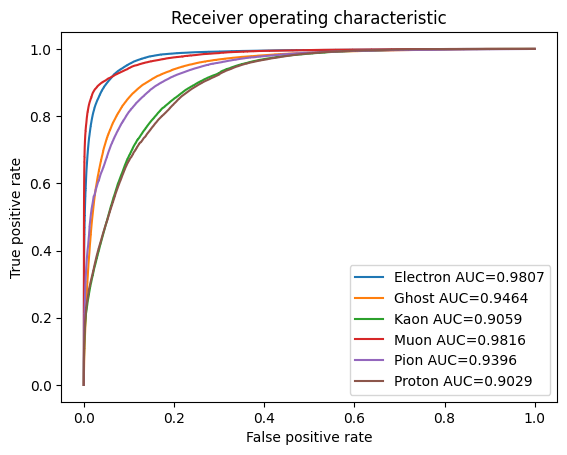

In [28]:
plt.figure()
plt.title("Receiver operating characteristic")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
for l, label in enumerate(labels):
    plt.plot(roc[l]['fpr'], roc[l]['tpr'], label='{} AUC={:.4f}'.format(label, auc[l]))
_ = plt.legend(loc='lower right')

              precision    recall  f1-score   support

    Electron       0.83      0.86      0.85     49983
       Ghost       0.70      0.77      0.73     49964
        Kaon       0.63      0.53      0.57     49901
        Muon       0.92      0.85      0.88     50344
        Pion       0.62      0.80      0.70     49894
      Proton       0.62      0.51      0.56     49914

    accuracy                           0.72    300000
   macro avg       0.72      0.72      0.72    300000
weighted avg       0.72      0.72      0.72    300000



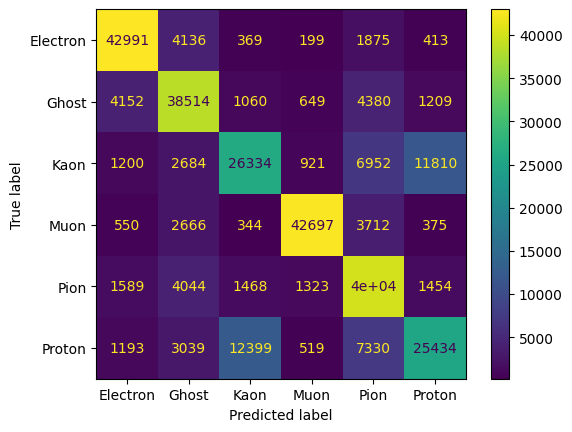

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

y_true = y_test
y_pred = c.predict(x_test)

print(classification_report(y_true, y_pred, target_names=labels))

cm = confusion_matrix(y_true, y_pred)

cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
_ = cmd.plot()

### Нейронные сети

In [30]:
import tensorflow as tf
tf.random.set_seed(43)

2025-06-05 12:48:50.981299: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-05 12:48:51.415787: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-05 12:48:51.415836: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-05 12:48:51.471004: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-05 12:48:51.597926: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-05 12:48:51.598727: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [31]:
INPUT_DIM  = x_train.shape[1]
HIDDEN_DIM = 100
OUTPUT_DIM = len(labels)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(HIDDEN_DIM, activation="linear"),
    tf.keras.layers.Dense(OUTPUT_DIM, activation="softmax"),
])

learning_rate = 1e-4
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, tf.keras.utils.to_categorical(y_train, num_classes=len(labels)),
          epochs=20, batch_size=100,
          validation_data=(x_test, tf.keras.utils.to_categorical(y_test, num_classes=len(labels))))

Epoch 1/20
9000/9000 [==============================] - 16s 2ms/step - loss: 56.1785 - accuracy: 0.4973 - val_loss: 8.5626 - val_accuracy: 0.4956
Epoch 2/20
9000/9000 [==============================] - 15s 2ms/step - loss: 5.6529 - accuracy: 0.5669 - val_loss: 13.4160 - val_accuracy: 0.5308
Epoch 3/20
9000/9000 [==============================] - 15s 2ms/step - loss: 5.6123 - accuracy: 0.5836 - val_loss: 4.4544 - val_accuracy: 0.6269
Epoch 4/20
9000/9000 [==============================] - 15s 2ms/step - loss: 5.6690 - accuracy: 0.5941 - val_loss: 4.0383 - val_accuracy: 0.6273
Epoch 5/20
9000/9000 [==============================] - 15s 2ms/step - loss: 5.6339 - accuracy: 0.6001 - val_loss: 4.5804 - val_accuracy: 0.6185
Epoch 6/20
9000/9000 [==============================] - 15s 2ms/step - loss: 5.6155 - accuracy: 0.6037 - val_loss: 5.6541 - val_accuracy: 0.6045
Epoch 7/20
9000/9000 [==============================] - 15s 2ms/step - loss: 5.5313 - accuracy: 0.6084 - val_loss: 3.9903 - val_

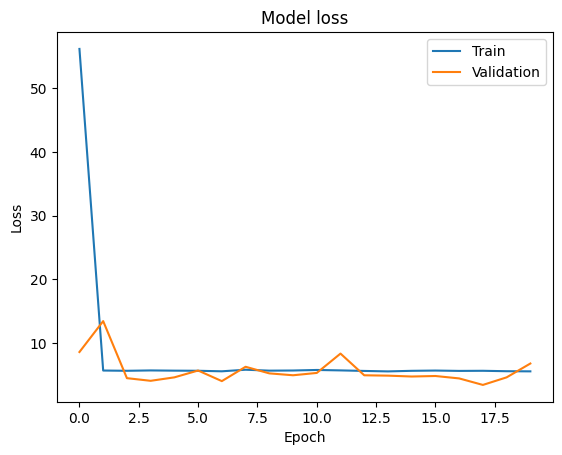

In [32]:
plt.figure()
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Validation")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

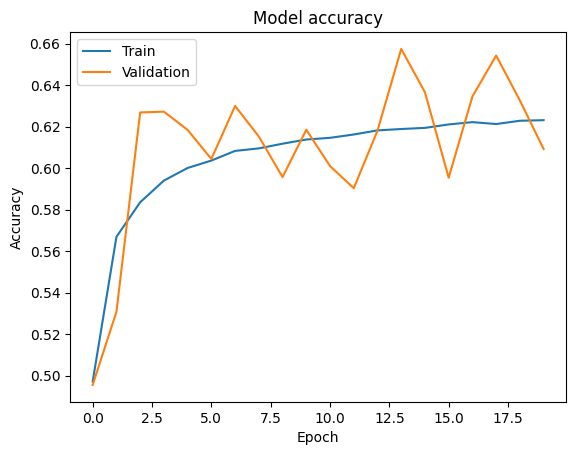

In [33]:
plt.figure()
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Validation")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

In [34]:
scores = model.predict(x_test)

roc = {}
auc = {}
for l, label in enumerate(labels):
    lscores = scores[:,l]
    one_y_test = np.asarray((y_test == l).astype(np.float32))
    
    fpr, tpr, _ = sklearn.metrics.roc_curve(one_y_test, lscores)
    roc[l] = {"tpr": tpr, "fpr": fpr}
    auc[l] = sklearn.metrics.roc_auc_score(one_y_test, lscores)

9375/9375 [==============================] - 10s 1ms/step


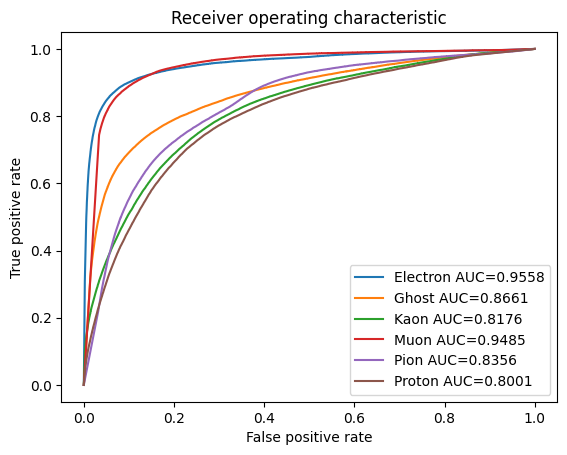

In [35]:
plt.figure()
plt.title("Receiver operating characteristic")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
for l, label in enumerate(labels):
    plt.plot(roc[l]['fpr'], roc[l]['tpr'], label='{} AUC={:.4f}'.format(label, auc[l]))
_ = plt.legend(loc='lower right')

9375/9375 [==============================] - 10s 1ms/step
              precision    recall  f1-score   support

    Electron       0.90      0.70      0.79     49983
       Ghost       0.53      0.73      0.61     49964
        Kaon       0.56      0.40      0.47     49901
        Muon       0.71      0.85      0.78     50344
        Pion       0.49      0.61      0.55     49894
      Proton       0.52      0.35      0.42     49914

    accuracy                           0.61    300000
   macro avg       0.62      0.61      0.60    300000
weighted avg       0.62      0.61      0.60    300000



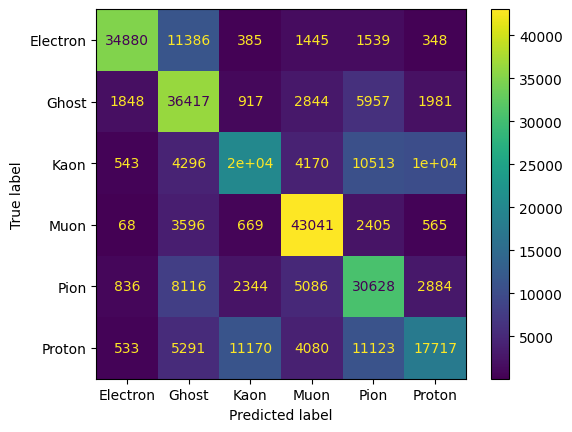

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

y_true = y_test
y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_true, y_pred, target_names=labels))

cm = confusion_matrix(y_true, y_pred)

cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
_ = cmd.plot()